# Setup

~~Create environment~~\
~~open file and create dataframe~~\
~~remove outliers using turkey outliers~~

# Figures and Table to Replicate

~~Figure 1~~\
~~Figure 2~~\
~~Figure 3~~\
Table 2\
~~Table 3~~\
~~Table 4~~\
Table 5\
Table 6\
Table 7

In [102]:
import pandas as pd
import math
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import spearmanr

In [103]:
# Reading input file and creating dataframe for analysis

df = pd.read_csv("/Users/admin/Downloads/nout.csv", sep=",")   
df["sloc"]=df['Insertions']+df['Deletions']
df.drop(df.loc[df['Language']=='Javascript'].index, inplace=True)
df.head()

,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,sloc
0,C,ARMmbed/DAPLink,1,2015-06-26 19:25:11,2015-06-26 19:25:50,0,2,86,164,250
1,C,ARMmbed/DAPLink,10,2015-09-29 23:33:53,2015-09-30 19:38:09,1204,5,204,0,204
2,C,ARMmbed/DAPLink,104,2016-05-19 01:48:57,2016-05-19 18:09:56,980,1,1,1,2
3,C,ARMmbed/DAPLink,108,2016-06-02 01:26:45,2016-06-02 16:23:28,896,2,15,0,15
4,C,ARMmbed/DAPLink,110,2016-06-14 20:27:04,2016-07-20 13:58:13,51451,14,91,10,101


In [104]:
display(df)

,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,sloc
0,C,ARMmbed/DAPLink,1,2015-06-26 19:25:11,2015-06-26 19:25:50,0,2,86,164,250
1,C,ARMmbed/DAPLink,10,2015-09-29 23:33:53,2015-09-30 19:38:09,1204,5,204,0,204
2,C,ARMmbed/DAPLink,104,2016-05-19 01:48:57,2016-05-19 18:09:56,980,1,1,1,2
3,C,ARMmbed/DAPLink,108,2016-06-02 01:26:45,2016-06-02 16:23:28,896,2,15,0,15
4,C,ARMmbed/DAPLink,110,2016-06-14 20:27:04,2016-07-20 13:58:13,51451,14,91,10,101
...,...,...,...,...,...,...,...,...,...,...
726615,Java,zoontek/react-native-localize,93,2020-03-11 08:39:06,2020-03-11 09:54:54,75,2,2,2,4
726616,Java,zoontek/react-native-localize,95,2020-03-14 07:58:01,2020-03-14 17:43:24,585,1,3,3,6
726617,Java,zzz40500/AndroidSweetSheet,13,2016-02-23 11:09:17,2016-02-25 08:29:14,2719,1,1,1,2
726618,Java,zzz40500/AndroidSweetSheet,14,2016-03-03 10:03:39,2016-03-03 10:07:10,3,5,18,2,20


In [105]:
# Using turkey outlier to drop outliers in the data. This is the same method as the original study for continuity

def turkey_outlier(df, column, whisker_width=1):
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     

# Example for whiskers = 1.5, as requested by the OP
table3=df.copy()
display(df)
display(df.describe())
df = turkey_outlier(df, 'Merge time minutes', whisker_width=1)
df = turkey_outlier(df, 'sloc', whisker_width=1)
display(df)
df.describe()

,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,sloc
0,C,ARMmbed/DAPLink,1,2015-06-26 19:25:11,2015-06-26 19:25:50,0,2,86,164,250
1,C,ARMmbed/DAPLink,10,2015-09-29 23:33:53,2015-09-30 19:38:09,1204,5,204,0,204
2,C,ARMmbed/DAPLink,104,2016-05-19 01:48:57,2016-05-19 18:09:56,980,1,1,1,2
3,C,ARMmbed/DAPLink,108,2016-06-02 01:26:45,2016-06-02 16:23:28,896,2,15,0,15
4,C,ARMmbed/DAPLink,110,2016-06-14 20:27:04,2016-07-20 13:58:13,51451,14,91,10,101
...,...,...,...,...,...,...,...,...,...,...
726615,Java,zoontek/react-native-localize,93,2020-03-11 08:39:06,2020-03-11 09:54:54,75,2,2,2,4
726616,Java,zoontek/react-native-localize,95,2020-03-14 07:58:01,2020-03-14 17:43:24,585,1,3,3,6
726617,Java,zzz40500/AndroidSweetSheet,13,2016-02-23 11:09:17,2016-02-25 08:29:14,2719,1,1,1,2
726618,Java,zzz40500/AndroidSweetSheet,14,2016-03-03 10:03:39,2016-03-03 10:07:10,3,5,18,2,20


,PR ID,Merge time minutes,Files changed,Insertions,Deletions,sloc
count,726482.000000,7.264820e+05,726482.000000,7.264820e+05,7.264820e+05,7.264820e+05
mean,3658.453004,1.569305e+04,11.410424,7.821257e+02,4.915524e+02,1.273678e+03
std,9902.972159,7.623409e+04,256.953176,3.190354e+04,1.952443e+04,3.881096e+04
min,1.000000,-4.500000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,336.000000,5.200000e+01,1.000000,3.000000e+00,1.000000e+00,5.000000e+00
50%,1124.000000,7.450000e+02,2.000000,1.400000e+01,4.000000e+00,2.200000e+01
75%,3180.000000,5.445000e+03,5.000000,7.300000e+01,2.200000e+01,1.110000e+02
max,167053.000000,3.792558e+06,84350.000000,1.406023e+07,6.644953e+06,1.406026e+07


,Language,Project,PR ID,Created At,Merged At,Merge time minutes,Files changed,Insertions,Deletions,sloc
2,C,ARMmbed/DAPLink,104,2016-05-19 01:48:57,2016-05-19 18:09:56,980,1,1,1,2
3,C,ARMmbed/DAPLink,108,2016-06-02 01:26:45,2016-06-02 16:23:28,896,2,15,0,15
8,C,ARMmbed/DAPLink,120,2016-07-08 23:47:22,2016-07-10 21:40:21,2752,3,17,0,17
10,C,ARMmbed/DAPLink,122,2016-07-11 20:31:10,2016-07-11 23:15:21,164,3,7,7,14
11,C,ARMmbed/DAPLink,124,2016-07-13 15:37:51,2016-07-13 20:37:38,299,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
726615,Java,zoontek/react-native-localize,93,2020-03-11 08:39:06,2020-03-11 09:54:54,75,2,2,2,4
726616,Java,zoontek/react-native-localize,95,2020-03-14 07:58:01,2020-03-14 17:43:24,585,1,3,3,6
726617,Java,zzz40500/AndroidSweetSheet,13,2016-02-23 11:09:17,2016-02-25 08:29:14,2719,1,1,1,2
726618,Java,zzz40500/AndroidSweetSheet,14,2016-03-03 10:03:39,2016-03-03 10:07:10,3,5,18,2,20


,PR ID,Merge time minutes,Files changed,Insertions,Deletions,sloc
count,501557.000000,501557.000000,501557.000000,501557.000000,501557.000000,501557.000000
mean,3878.561264,1413.466653,2.869969,21.972001,9.792279,31.764280
std,10823.802136,2331.224160,17.759119,32.248187,17.841191,42.110446
min,1.000000,-45.000000,0.000000,0.000000,0.000000,0.000000
25%,335.000000,29.000000,1.000000,2.000000,1.000000,4.000000
50%,1131.000000,277.000000,1.000000,8.000000,3.000000,12.000000
75%,3256.000000,1515.000000,3.000000,28.000000,10.000000,42.000000
max,167053.000000,10838.000000,6632.000000,191.000000,191.000000,191.000000


In [106]:
# Table 2: Distribution of outliers excluded based on SLOC. Random sample of N = 100.
#manually done 


In [107]:
# Table 3: Time-to-merge (hours) and SLOC per pull request before and after removing the outliers using Tukey 1.5×𝐼𝑄𝑅 fence. N = total number, M = mean, Mdn = median, SD = standard deviation.
#before filtering dataset
day=table3["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
pull= table3.copy()
pull["Merge time minutes"]=day
pull=pull.drop(columns=["PR ID", "Files changed","Insertions","Deletions"])
before=pull.agg({ 'Merge time minutes': ['count','mean','median', 'std'], 'sloc': ['mean','median', 'std']}).rename(columns={"Merge time minutes":"Merge time hours","count":"N"})

#filter outliers
table3 = turkey_outlier(table3, 'Merge time minutes', whisker_width=1)
table3 = turkey_outlier(table3, 'sloc', whisker_width=1)

#after filtering dataset
day=df["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
pull=pd.DataFrame()
pull= table3.copy()
pull["Merge time minutes"]=day
pull=pull.drop(columns=["PR ID", "Files changed","Insertions","Deletions"])
after=pull.agg({ 'Merge time minutes': ['count','mean','median', 'std'], 'sloc': ['mean','median', 'std']}).rename(columns={"Merge time minutes":"Merge time hours","count":"N"})

#combining the before and after metrics
combine=pd.concat([before,after], axis=1)
df1 = pd.concat([before], keys=["before"], names=['type'],axis=1)
df2 = pd.concat([after], keys=["after"], names=['type'],axis=1)
combine=pd.concat([df1,df2], axis=1)
display(combine)

type             before                          after           
       Merge time hours          sloc Merge time hours       sloc
count     726482.000000           NaN    501557.000000        NaN
mean         262.065600   1273.678141        24.080625  31.764280
median        13.000000     22.000000         5.000000  12.000000
std         1270.563274  38810.955168        38.836007  42.110446

In [108]:
# Table 4 Time-to-merge (hours) and SLOC per pull request
# N = total number, M = mean, Mdn = median, SD = standard deviation.


day=df["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
pull=pd.DataFrame()
pull= df.copy()
pull["Merge time minutes"]=day
pull=pull.drop(columns=["PR ID", "Files changed","Insertions","Deletions"])
pull=pull.groupby(["Language"]).agg({ 'Merge time minutes': ['count','mean','median', 'std'], 'sloc': ['mean','median', 'std']}).rename(columns={"Merge time minutes":"Merge time hours","count":"N"})
display(pull)

Merge time hours                                    sloc         \
                          N       mean median        std       mean median   
Language                                                                     
C                     15448  29.913775   10.0  42.487343  31.548097   12.0   
CPP                   29184  28.273472    9.0  41.169003  34.197334   14.0   
CSharp                29872  23.095876    4.0  38.240062  36.058014   16.0   
Go                    38493  23.875406    5.0  38.875417  33.527628   14.0   
Java                  41477  25.745690    6.0  40.028011  34.666032   13.0   
JavaScript            61886  24.457260    6.0  39.110373  29.207559   11.0   
PHP                   94152  22.719645    4.0  38.198948  29.614910   12.0   
Python                61609  25.102014    6.0  39.087920  31.855492   12.0   
Ruby                  38178  24.836136    6.0  38.958397  27.402457   10.0   
TypeScript            91258  21.547579    4.0  36.959446  33.269215   14.0   

                       
                  std  
Language               
C           42.318214  
CPP         43.744495  
CSharp      44.931670  
Go          43.043566  
Java        45.173576  
JavaScript  40.068445  
PHP         40.487194  
Python      42.213471  
Ruby        38.664087  
TypeScript  42.666578

In [109]:
# Table 5: Spearman correlation coefficient 𝑟𝑠 (𝑝 < .001) between time-to-merge (hours) and total SLOC. N = total number.

temp = df.copy()
temp = temp[['Language', 'Merge time minutes', 'sloc']]
temp['Merge time minutes'] = temp['Merge time minutes']/60
# ttm.rename(columns = {"Merge time minutes": "Merge time hours"})

temp = temp.groupby(["Language"]).agg(N = ('Language','count'))
#.corr(method='spearman').unstack()
print(temp)



#temp = temp.groupby(["Language"]).agg({"Merge time minutes": ['sum'], "sloc": ['sum']}).corr(method='spearman')
#print(temp)

#temp = temp[['Merge time minutes', 'sloc']]
#print(temp)

#print(temp.corr(method='spearman'))



#t5 = temp.groupby('Language')[['Merge time minutes', 'sloc']].corr(method='spearman').unstack()
#print(t5)


sloc = df[['Language', 'sloc']]


# #coef, p = spearmanr(ttm, sloc)
#print('Spearmans correlation coefficient: %.3f' % coef)

#alpha = 0.001
#if p<alpha:
   # print("good")

t5 = pd.DataFrame()
t5 = df.copy()
t5 = t5.groupby('Language')[['Merge time minutes', 'sloc']].corr(method='spearman').unstack().iloc[:,1]

#t5 = t5.groupby(["Language"]).agg({"Language":['count'], ['Merge time minutes']:})
#t5 = t5.to_frame()
#t5 = t5.rename(columns={'':'rs'}, inplace=True)
print(t5)
#list(t5.columns)
t5=temp.merge(t5, on="Language")
t5.columns = ["N", "rs"]
t5

                N
Language         
C           15448
CPP         29184
CSharp      29872
Go          38493
Java        41477
JavaScript  61886
PHP         94152
Python      61609
Ruby        38178
TypeScript  91258
Language
C             0.136723
CPP           0.160633
CSharp        0.077553
Go            0.109892
Java          0.131408
JavaScript    0.077845
PHP           0.079776
Python        0.166052
Ruby          0.166645
TypeScript    0.056350
Name: (Merge time minutes, sloc), dtype: float64


/var/folders/fr/qb0slnsj0vq8_c30p6gpnnbw0000gn/T/ipykernel_40613/2403032616.py:47: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  t5=temp.merge(t5, on="Language")


,N,rs
Language,,
C,15448,0.136723
CPP,29184,0.160633
CSharp,29872,0.077553
Go,38493,0.109892
Java,41477,0.131408
JavaScript,61886,0.077845
PHP,94152,0.079776
Python,61609,0.166052
Ruby,38178,0.166645


In [110]:
# Table 6: Spearman correlation coefficient 𝑟𝑠 (𝑝 < .001) between time-to-merge in hours and total SLOC in a pull request by pull request creation day. 
# N = total number
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
t6=df.copy()

t6['Merge time minutes'] = t6['Merge time minutes']/60
t6['create_date'] = pd.to_datetime(t6['Merged At']).dt.date
t6['create_date'] = pd.to_datetime(t6['create_date'])
t6['day-of-week'] = t6['create_date'].dt.dayofweek
t6.sort_values(['day-of-week'],ascending=True)
t6['day-of-week']=t6['day-of-week'].map(dayOfWeek)

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
groups = t6.groupby(["day-of-week"]).agg(N = ('Language','count'))
t6 = t6.groupby(['day-of-week'])[['Merge time minutes', 'sloc']].corr(method='spearman').unstack().iloc[:,1]
print(t6)
display(groups)
t6=groups.merge(t6, on="day-of-week")
t6.columns = ["N", "rs"]
t6.reindex(cats)


day-of-week
Friday       0.120025
Monday       0.110978
Saturday     0.042994
Sunday       0.042942
Thursday     0.125234
Tuesday      0.112448
Wednesday    0.116060
Name: (Merge time minutes, sloc), dtype: float64


,N
day-of-week,
Friday,78464
Monday,85648
Saturday,40666
Sunday,38842
Thursday,83349
Tuesday,88455
Wednesday,86133


/var/folders/fr/qb0slnsj0vq8_c30p6gpnnbw0000gn/T/ipykernel_40613/586041902.py:18: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  t6=groups.merge(t6, on="day-of-week")


,N,rs
day-of-week,,
Monday,85648,0.110978
Tuesday,88455,0.112448
Wednesday,86133,0.116060
Thursday,83349,0.125234
Friday,78464,0.120025
Saturday,40666,0.042994
Sunday,38842,0.042942


Text(0, 0.5, '% of total pull requests')

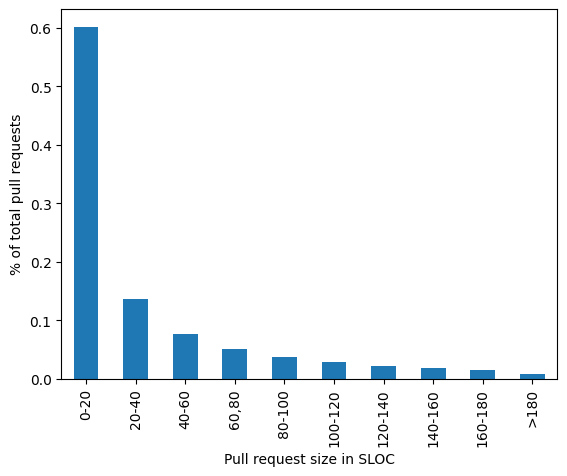

In [111]:
# Figure 1: A barplot of pull request sizes
bins = [0, 20, 40, 60, 80,100,120,140,160,180,200]
fig1 = df.copy()
fig1['Pull request size in SLOC'] = pd.cut(fig1['sloc'], [0, 20, 40, 60, 80,100,120,140,160,180,200], labels=['0-20',"20-40", '40-60',"60,80","80-100",'100-120' ,'120-140', "140-160", '160-180',">180"])
total=len(fig1)
groups = fig1.groupby(["Pull request size in SLOC"]).size()/total
ax=groups.plot.bar()
ax.set_ylabel("% of total pull requests")

Text(0, 0.5, '% of total pull requests')

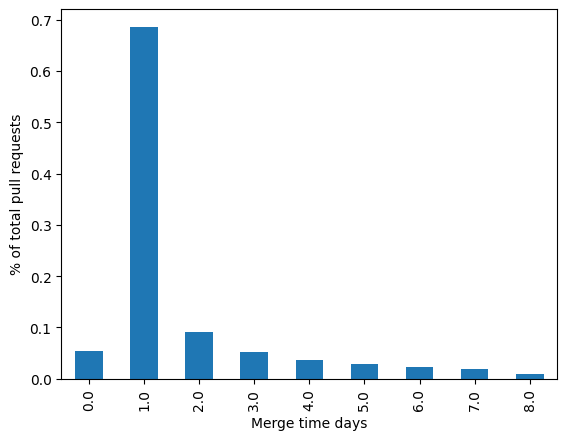

In [112]:
#Figure 2: A barplot of time-to-merge for pull requests.
fig2 = df.copy()
day=fig2["Merge time minutes"]/1440
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
fig2["Merge time days"]=day
total=len(fig2)
fig2.groupby(["Merge time days"])
groups = fig2.groupby(["Merge time days"]).size()/total
ax=groups.plot.bar()
ax.set_ylabel("% of total pull requests")

Text(0, 0.5, 'Merge time in hours')

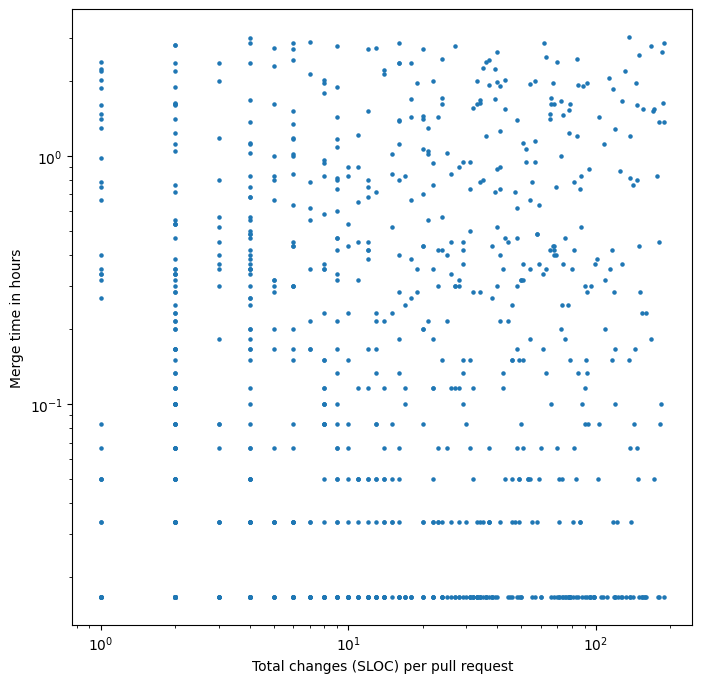

In [113]:
# Figure 3
# A scatter plot of pull request sizes and time-to-merge. Random sample of 𝑁 = 1,000 pull requests.
sloc=df.sample(n=1000,random_state=3)
day=sloc["Merge time minutes"]/60
day=pd.to_numeric(day, downcast='integer').apply(np.ceil)
sloc["Merge time minutes"]=day

plt.figure(figsize=(8,8))
plt.axes(xscale='log', yscale='log')
plt.scatter(sloc['sloc'], sloc["Merge time minutes"]/60,s=5)
plt.xlabel('Total changes (SLOC) per pull request')
plt.ylabel('Merge time in hours')

In [114]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
t6=df.copy()

t6['Merge time minutes'] = t6['Merge time minutes']/60
t6 = t6[['Merge time minutes', 'Insertions']].corr(method='spearman')
t6


,Merge time minutes,Insertions
Merge time minutes,1.00000,0.11735
Insertions,0.11735,1.00000


In [115]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
t6=df.copy()

t6['Merge time minutes'] = t6['Merge time minutes']/60
t6 = t6[['Merge time minutes', 'Deletions']].corr(method='spearman')
t6

,Merge time minutes,Deletions
Merge time minutes,1.000000,0.023778
Deletions,0.023778,1.000000


In [116]:
t6=df.copy()

t6['Merge time minutes'] = t6['Merge time minutes']/60
t6 = t6[['Merge time minutes', 'sloc']].corr(method='spearman')
t6

,Merge time minutes,sloc
Merge time minutes,1.000000,0.103974
sloc,0.103974,1.000000


                 N
day-of-week       
Monday       85648
Tuesday      88455
Wednesday    86133
Thursday     83349
Friday       78464
Saturday     40666
Sunday       38842


/var/folders/fr/qb0slnsj0vq8_c30p6gpnnbw0000gn/T/ipykernel_40613/2909242249.py:14: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  t6=groups.merge(t6, on="day-of-week")


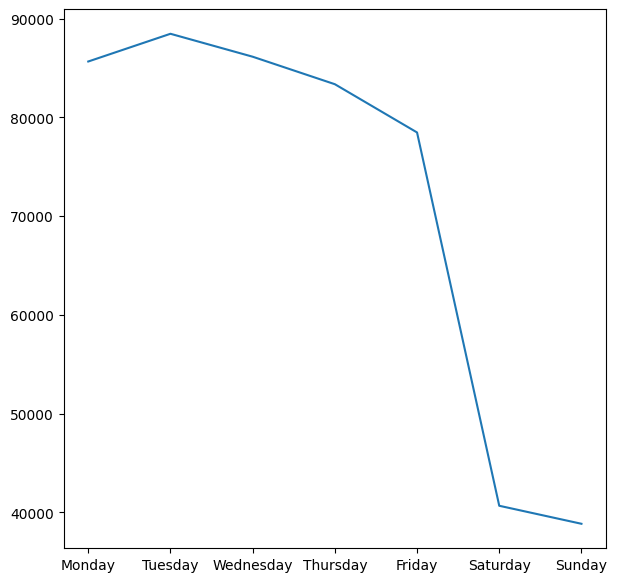

In [117]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
t6=df.copy()

t6['Merge time minutes'] = t6['Merge time minutes']/60
t6['create_date'] = pd.to_datetime(t6['Merged At']).dt.date
t6['create_date'] = pd.to_datetime(t6['create_date'])
t6['day-of-week'] = t6['create_date'].dt.dayofweek
t6.sort_values(['day-of-week'],ascending=True)
t6['day-of-week']=t6['day-of-week'].map(dayOfWeek)

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
groups = t6.groupby(["day-of-week"]).agg(N = ('Language','count'))
t6 = t6.groupby(['day-of-week'])[['Merge time minutes', 'sloc']].corr(method='spearman').unstack().iloc[:,1]
t6=groups.merge(t6, on="day-of-week")
t6.columns = ["N", "rs"]
t6.reindex(cats)
groups=groups.reindex(cats)
print(groups)
plt.figure(figsize=(7,7))
plt.plot(groups)